In [41]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize
import arabicstopwords.arabicstopwords as stp
stop_words = stp.classed_stopwords_list()
customized_stop_words = {"المغربي","المغرب","المغربية","محمد","عبد","وهو","أنه","كانت","فيها"}
import re
from nltk.tokenize import word_tokenize
from collections import Counter

In [42]:
df=pd.DataFrame()
topics=["tamazight","sport","societe","regions","politique","orbites","medias","marocains-du-monde","faits-divers","economie","art-et-culture"]

for topic in topics:
  df=pd.concat([df,pd.read_csv(r"E:\widebot\task2\Data\stories_"+topic+".csv")])

df.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

In [43]:
df.shape

(11000, 6)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11000 non-null  object
 1   title   11000 non-null  object
 2   date    11000 non-null  object
 3   author  11000 non-null  object
 4   story   11000 non-null  object
 5   topic   11000 non-null  object
dtypes: object(6)
memory usage: 601.6+ KB


In [45]:
pd.options.display.max_colwidth = 100
df.head()

,id,title,date,author,story,topic
0,9de52a46055311eb8949646e69d991ea,وزارة التربية: لا تغيير في الغلاف الزمني للأمازيغية,السبت 03 أكتوبر 2020 - 00:02,هسبريس من الرباط,قالت وزارة التربية الوطنية والتكوين المهني والتعليم العالي والبحث العلمي، قطاع التربية الوطنية، ...,tamazight
1,9ee74b02055311ebb757646e69d991ea,"""تغييب"" تدريس الأمازيغية يغضب نقابات بتزنيت",الاثنين 28 شتنبر 2020 - 09:13,رشيد بيجيكن من أكادير,طالبت الكتابة الإقليمية للجامعة الوطنية للتعليم -التوجه الديمقراطي- بتزنيت المدير الإقليمي لوزار...,tamazight
2,9fed7812055311eb9158646e69d991ea,مرصد يستنكر رفض قبول أستاذة أمازيغية بمدرسة,الاثنين 28 شتنبر 2020 - 00:41,هسبريس من الرباط,أفاد المرصد الأمازيغي للحقوق والحريات أنه توصل بمعطيات تفيد بأن أستاذة للغة الأمازيغية حديثة الت...,tamazight
3,a0e39038055311eb8f78646e69d991ea,نص امتحان موحد يثير حنق فعاليات أمازيغية,السبت 26 شتنبر 2020 - 17:28,هسبريس من الرّباط,سجلت فعاليات مدنية أمازيغية عديدة امتعاضها من نص امتحان في اللغة العربية لنيل شهادة التعليم الاب...,tamazight
4,a1d90814055311eb879e646e69d991ea,"""عادل تيزنيت"" يتحف المغاربة بالموسيقى الأمازيغية",السبت 26 شتنبر 2020 - 15:50,هسبريس من الرباط,"من داخل سيارة بسيطة يركنها بالمدخل الشمالي لمدينة تيزنيت، تمكن الفنان المغربي ""عادل تيزنيت"" من ا...",tamazight


In [46]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  0


<AxesSubplot:xlabel='topic', ylabel='story'>

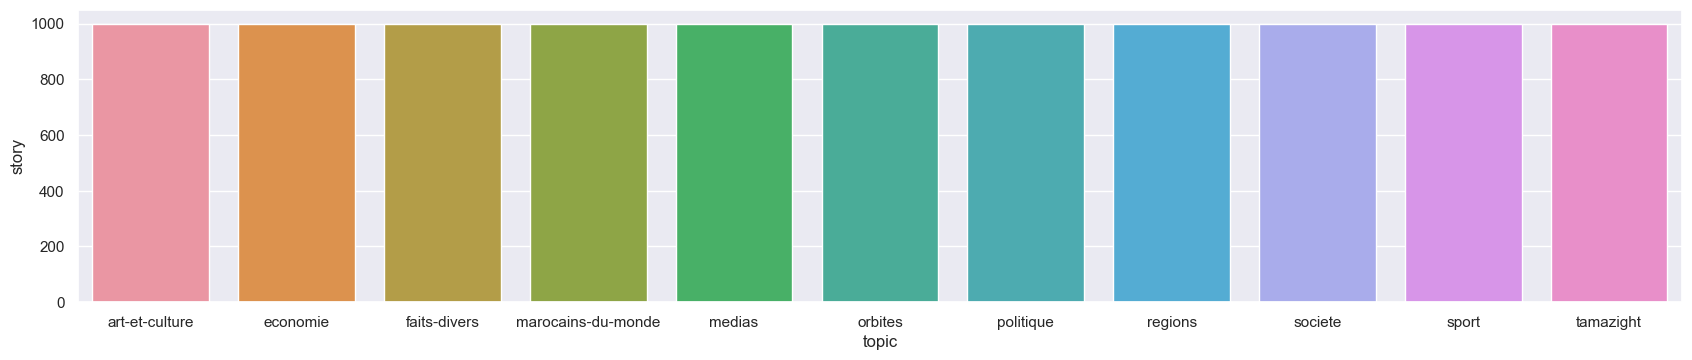

In [47]:
df_topic=df.groupby(by="topic").count()["story"]
sns.set(rc={'figure.figsize':(20.7,3.8)})
sns.barplot(x=df_topic.index,y=df_topic)


In [48]:
def text_processing(x):
     x = re.sub('<br />','', x)
     x = re.sub(r"https\S+|www\S+|http\S+", '', x, flags = re.MULTILINE)
     x = re.sub(r'\@w+|\#', '', x)
     x = re.sub(r'[^\w\s]','',x)
     x_tokens = word_tokenize(x)
     ##x_filtered = [i for i in x_tokens if not i in stop_words and not i in customized_stop_words]
     return " ".join(x_tokens)

In [49]:
df.story = df['story'].apply(text_processing)

In [50]:
df

,id,title,date,author,story,topic
0,9de52a46055311eb8949646e69d991ea,وزارة التربية: لا تغيير في الغلاف الزمني للأمازيغية,السبت 03 أكتوبر 2020 - 00:02,هسبريس من الرباط,قالت وزارة التربية الوطنية والتكوين المهني والتعليم العالي والبحث العلمي قطاع التربية الوطنية إن...,tamazight
1,9ee74b02055311ebb757646e69d991ea,"""تغييب"" تدريس الأمازيغية يغضب نقابات بتزنيت",الاثنين 28 شتنبر 2020 - 09:13,رشيد بيجيكن من أكادير,طالبت الكتابة الإقليمية للجامعة الوطنية للتعليم التوجه الديمقراطي بتزنيت المدير الإقليمي لوزارة ...,tamazight
2,9fed7812055311eb9158646e69d991ea,مرصد يستنكر رفض قبول أستاذة أمازيغية بمدرسة,الاثنين 28 شتنبر 2020 - 00:41,هسبريس من الرباط,أفاد المرصد الأمازيغي للحقوق والحريات أنه توصل بمعطيات تفيد بأن أستاذة للغة الأمازيغية حديثة الت...,tamazight
3,a0e39038055311eb8f78646e69d991ea,نص امتحان موحد يثير حنق فعاليات أمازيغية,السبت 26 شتنبر 2020 - 17:28,هسبريس من الرّباط,سجلت فعاليات مدنية أمازيغية عديدة امتعاضها من نص امتحان في اللغة العربية لنيل شهادة التعليم الاب...,tamazight
4,a1d90814055311eb879e646e69d991ea,"""عادل تيزنيت"" يتحف المغاربة بالموسيقى الأمازيغية",السبت 26 شتنبر 2020 - 15:50,هسبريس من الرباط,من داخل سيارة بسيطة يركنها بالمدخل الشمالي لمدينة تيزنيت تمكن الفنان المغربي عادل تيزنيت من الوص...,tamazight
...,...,...,...,...,...,...
995,97e7b078055311eb972a646e69d991ea,مِهَنيّون: غياب توقيع رئيس الحكومة يوقف 200 مشروع سينمائي,الاثنين 18 نونبر 2019 - 00:25,هسبريس - وائل بورشاشن,تستمر الآثار الجانبية للانتقال الحكومي الأخير في الظهور هذه المرة في القطاع السينمائي بعد ما نقل...,art-et-culture
996,98f7723e055311ebb811646e69d991ea,"ندوة تقارب ""جهود السوسيين"" في خدمة العربية",الأحد 17 نونبر 2019 - 11:15,الحسين حرّان,قال الدكتور المهدي السعيدي في ندوة حول جهود السوسيين في خدمة اللغة العربية وعلومها إن أهمية اللغ...,art-et-culture
997,9a29bc06055311ebbb05646e69d991ea,تتويج أشرطة في مهرجان سينما الذاكرة المشتركة,السبت 16 نونبر 2019 - 20:17,هسبريس من الرباط,أجمعت لجنة المسابقة الخاصة بالأفلام المغربية التي تناولت حقبة سنوات الرصاص ضمن الدورة الثامنة لل...,art-et-culture
998,9b547968055311ebb870646e69d991ea,ريشة التشكيلية بثينة أزمي تتمرد على الظلم والعبودية تجاه النساء,السبت 16 نونبر 2019 - 10:00,هسبريس - كاميليا كريم,ألوان حية ولمسات تعبيرية تحمل مآسي إنسانية لرصد تيمة النساء والعبودية انسجمت في معرض تشكيلي جديد...,art-et-culture


In [51]:
# Character counts
df["letters_count"] = df["story"].map(lambda x : len(x) - x.count(' '))
# Word counts
df["words_count"] = df["story"].map(lambda x: len(x.split()))

In [52]:
pd.options.display.max_colwidth = 50
df.head(5)

,id,title,date,author,story,topic,letters_count,words_count
0,9de52a46055311eb8949646e69d991ea,وزارة التربية: لا تغيير في الغلاف الزمني للأما...,السبت 03 أكتوبر 2020 - 00:02,هسبريس من الرباط,قالت وزارة التربية الوطنية والتكوين المهني وال...,tamazight,455,83
1,9ee74b02055311ebb757646e69d991ea,"""تغييب"" تدريس الأمازيغية يغضب نقابات بتزنيت",الاثنين 28 شتنبر 2020 - 09:13,رشيد بيجيكن من أكادير,طالبت الكتابة الإقليمية للجامعة الوطنية للتعلي...,tamazight,1357,246
2,9fed7812055311eb9158646e69d991ea,مرصد يستنكر رفض قبول أستاذة أمازيغية بمدرسة,الاثنين 28 شتنبر 2020 - 00:41,هسبريس من الرباط,أفاد المرصد الأمازيغي للحقوق والحريات أنه توصل...,tamazight,1100,218
3,a0e39038055311eb8f78646e69d991ea,نص امتحان موحد يثير حنق فعاليات أمازيغية,السبت 26 شتنبر 2020 - 17:28,هسبريس من الرّباط,سجلت فعاليات مدنية أمازيغية عديدة امتعاضها من ...,tamazight,502,96
4,a1d90814055311eb879e646e69d991ea,"""عادل تيزنيت"" يتحف المغاربة بالموسيقى الأمازيغية",السبت 26 شتنبر 2020 - 15:50,هسبريس من الرباط,من داخل سيارة بسيطة يركنها بالمدخل الشمالي لمد...,tamazight,1396,274


In [53]:
average_df = pd.DataFrame()
average_df ["average_letters_count"]= df.groupby('topic')['letters_count'].mean()
average_df ["average_words_count"]= df.groupby('topic')['words_count'].mean()
average_df

,average_letters_count,average_words_count
topic,,
art-et-culture,2139.847,426.099
economie,1774.603,344.926
faits-divers,757.556,149.231
marocains-du-monde,1931.584,374.559
medias,2778.525,545.078
orbites,3238.874,642.337
politique,1753.405,336.144
regions,1160.005,223.210
societe,1705.422,331.992


<AxesSubplot:title={'center':'words_count'}, xlabel='topic'>

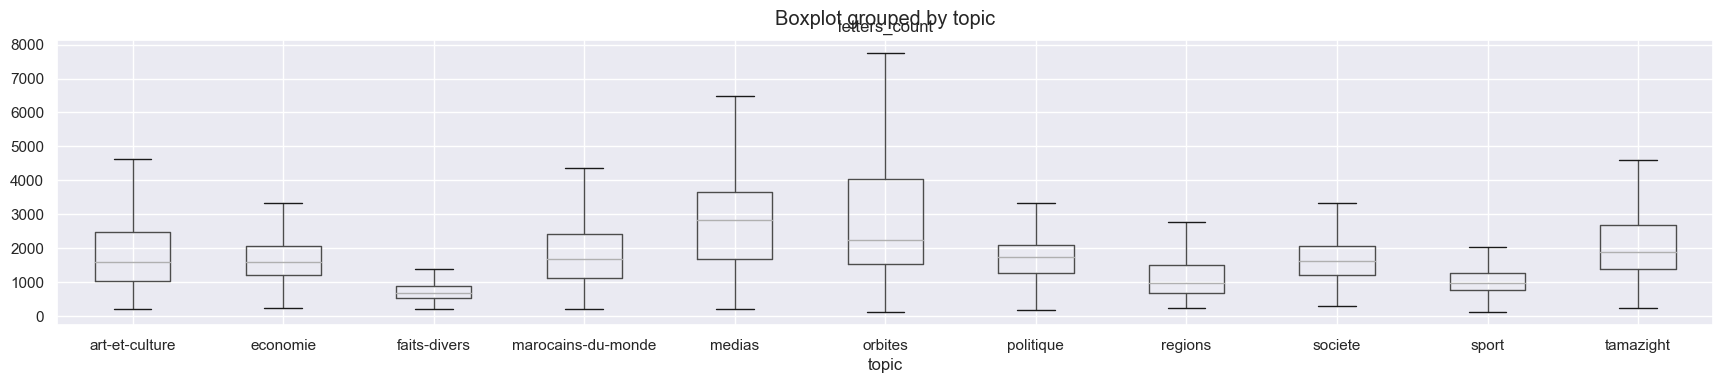

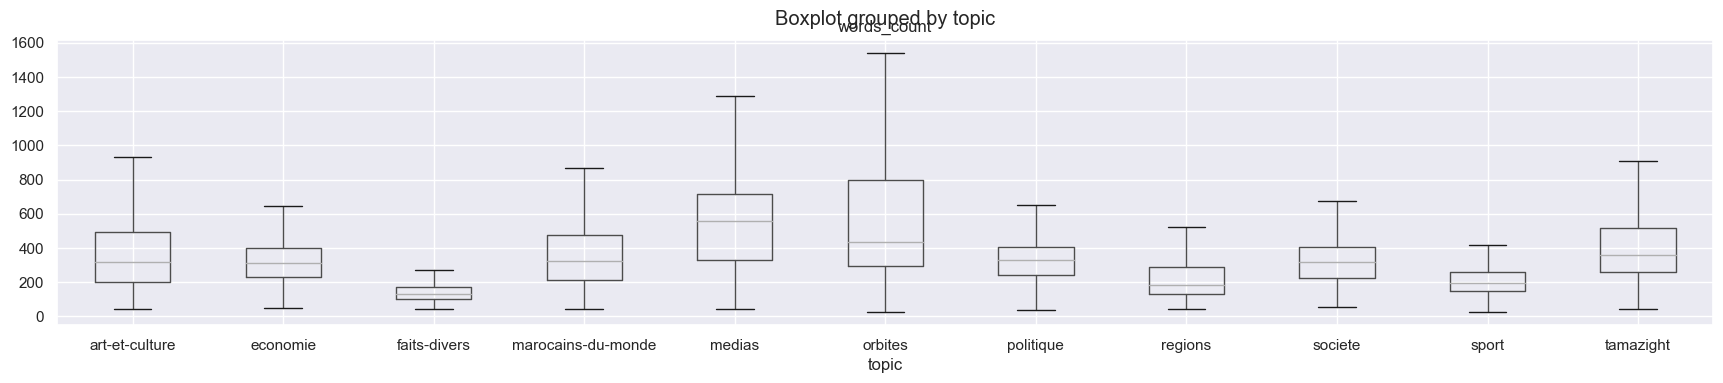

In [54]:
df.boxplot(column='letters_count', by = 'topic',showfliers=False) ## Note: - without outliers
df.boxplot(column='words_count', by = 'topic',showfliers=False) ## Note: - without outliers

In [55]:
import pandas as pd
from collections import Counter
import re

def get_bigram_frequency(dataframe, column_name):
    all_text = " ".join(dataframe[column_name].astype(str))
    words = re.findall(r'\b\w+\b', all_text.lower())
    bigrams = [words[i] + " " + words[i + 1] for i in range(len(words) - 1)]
    bigram_frequency = Counter(bigrams)
    return bigram_frequency

bigram_frequency_dict = get_bigram_frequency(df, 'story')
sorted_bigram_frequency = dict(sorted(bigram_frequency_dict.items(), key=lambda x: x[1], reverse=True))

In [56]:
# Convert the sorted trigram frequencies to a DataFrame for plotting
pd.options.display.max_colwidth = 60
top_10_df = pd.DataFrame(list(sorted_bigram_frequency.items()), columns=['Bigram', 'Frequency'])
top_10_df.head(10)

,Bigram,Frequency
0,من أجل,5733
1,إلى أن,5654
2,من خلال,3604
3,في المائة,3103
4,وهو ما,2904
5,من طرف,2704
6,في هذا,2690
7,فيروس كورونا,2546
8,على أن,2319
9,في إطار,2216


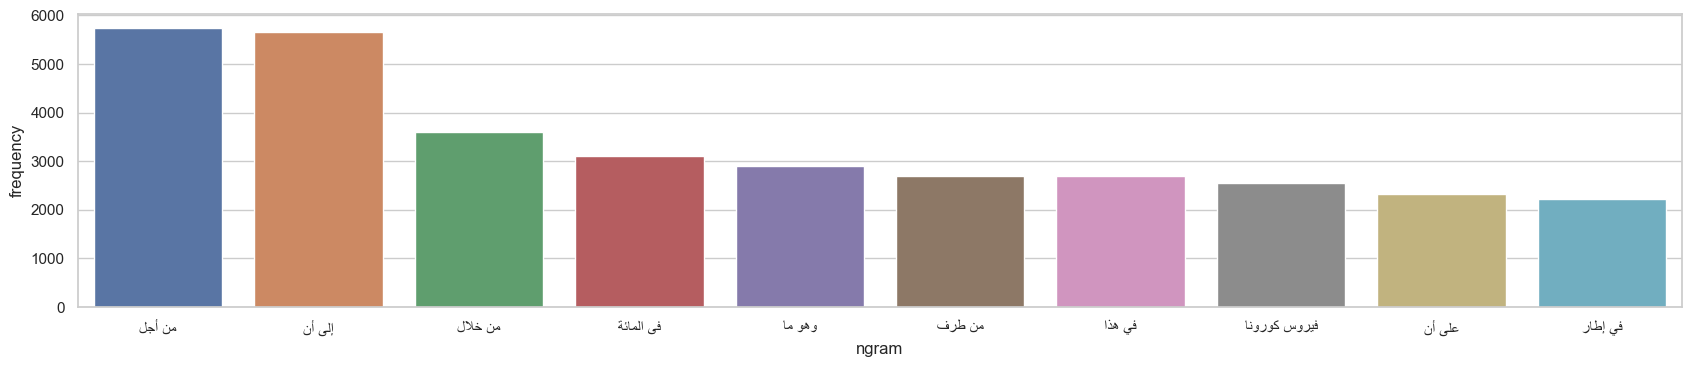

In [57]:
import arabic_reshaper
from bidi.algorithm import get_display
res = {
 'من أجل': 5733,
 'إلى أن': 5654,
 'من خلال': 3604,
 'فى المائة': 3103,
 'وهو ما': 2904,
 'من طرف': 2704,
 'في هذا': 2690,
 'فيروس كورونا': 2546,
 'على أن': 2319,
 'في إطار': 2216
}

res2 = {get_display(arabic_reshaper.reshape(k)): v for k,v in res.items()}

df_barplot2 = pd.DataFrame(res2.items(), columns=['ngram', 'frequency'])

sns.set(style="whitegrid")
ax = sns.barplot(x="ngram", y="frequency", data=df_barplot2)

In [58]:
def get_trigram_frequency(dataframe, column_name):
    all_text = " ".join(dataframe[column_name].astype(str))
    words = re.findall(r'\b\w+\b', all_text.lower())
    trigrams = [words[i] + " " + words[i + 1] + " " + words[i + 2] for i in range(len(words) - 2)]
    trigram_frequency = Counter(trigrams)
    return trigram_frequency

trigram_frequency_dict = get_trigram_frequency(df, 'story')

sorted_trigram_frequency = dict(sorted(trigram_frequency_dict.items(), key=lambda x: x[1], reverse=True))

print("Top 10 most frequent trigrams:")
for i, (trigram, frequency) in enumerate(sorted_trigram_frequency.items()):
    print(f"{i+1}. {trigram}: {frequency}")
    if i == 9:
        break

Top 10 most frequent trigrams:
1. مشيرا إلى أن: 1131
2. الملك محمد السادس: 1105
3. في المائة من: 854
4. لجريدة هسبريس الإلكترونية: 808
5. فيروس كورونا المستجد: 796
6. في تصريح لهسبريس: 682
7. تصريح لجريدة هسبريس: 675
8. في تصريح لجريدة: 659
9. النيابة العامة المختصة: 585
10. بفيروس كورونا المستجد: 580


In [59]:
# Convert the sorted trigram frequencies to a DataFrame for plotting
pd.options.display.max_colwidth = 60
top_10_df = pd.DataFrame(list(sorted_trigram_frequency.items()), columns=['Trigram', 'Frequency'])
top_10_df.head(10)

,Trigram,Frequency
0,مشيرا إلى أن,1131
1,الملك محمد السادس,1105
2,في المائة من,854
3,لجريدة هسبريس الإلكترونية,808
4,فيروس كورونا المستجد,796
5,في تصريح لهسبريس,682
6,تصريح لجريدة هسبريس,675
7,في تصريح لجريدة,659
8,النيابة العامة المختصة,585
9,بفيروس كورونا المستجد,580


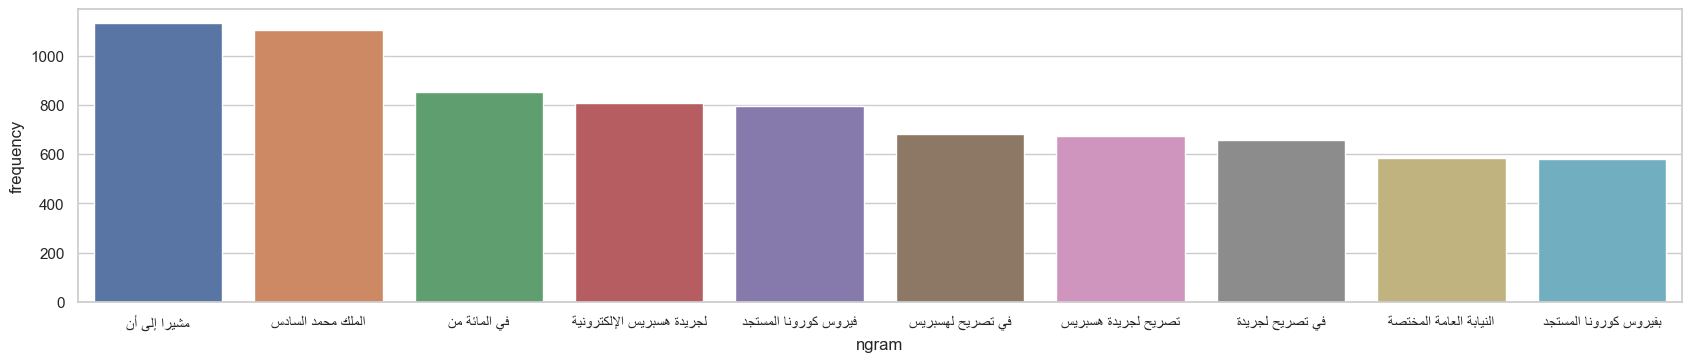

In [60]:
import arabic_reshaper
from bidi.algorithm import get_display
res = {
 'مشيرا إلى أن': 1131,
 'الملك محمد السادس': 1105,
 'في المائة من': 854,
 'لجريدة هسبريس الإلكترونية': 808,
 'فيروس كورونا المستجد': 796,
 'في تصريح لهسبريس': 682,
 'تصريح لجريدة هسبريس': 675,
 'في تصريح لجريدة': 659,
 'النيابة العامة المختصة': 585,
 'بفيروس كورونا المستجد': 580
}

res2 = {get_display(arabic_reshaper.reshape(k)): v for k,v in res.items()}

df_barplot2 = pd.DataFrame(res2.items(), columns=['ngram', 'frequency'])

sns.set(style="whitegrid")
ax = sns.barplot(x="ngram", y="frequency", data=df_barplot2)


In [65]:
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display

Topic: art-et-culture
Top 10 most frequent bigrams:
1. من خلال: 514
2. إلى أن: 445
3. من أجل: 360
4. في هذا: 325
5. مجموعة من: 288
6. العديد من: 251
7. في المغرب: 223
8. وهو ما: 223
9. عدد من: 186
10. في إطار: 179
Topic: economie
Top 10 most frequent bigrams:
1. في المائة: 1851
2. إلى أن: 614
3. مليار درهم: 526
4. من أجل: 509
5. من خلال: 476
6. فيروس كورونا: 472
7. المائة من: 400
8. وهو ما: 374
9. من طرف: 362
10. في المغرب: 279
Topic: faits-divers
Top 10 most frequent bigrams:
1. النيابة العامة: 728
2. العامة المختصة: 540
3. الحراسة النظرية: 407
4. المشتبه فيه: 376
5. من أجل: 351
6. الدرك الملكي: 344
7. من العمر: 322
8. قبل أن: 254
9. تحت إشراف: 251
10. هذه القضية: 247
Topic: marocains-du-monde
Top 10 most frequent bigrams:
1. من أجل: 744
2. الجالية المغربية: 596
3. إلى أن: 515
4. مغاربة العالم: 448
5. من خلال: 358
6. المقيمين بالخارج: 357
7. المغاربة العالقين: 354
8. في هذا: 309
9. عدد من: 308
10. على أن: 263
Topic: medias
Top 10 most frequent bigrams:
1. من أجل: 856
2. إلى أن: 759
3.

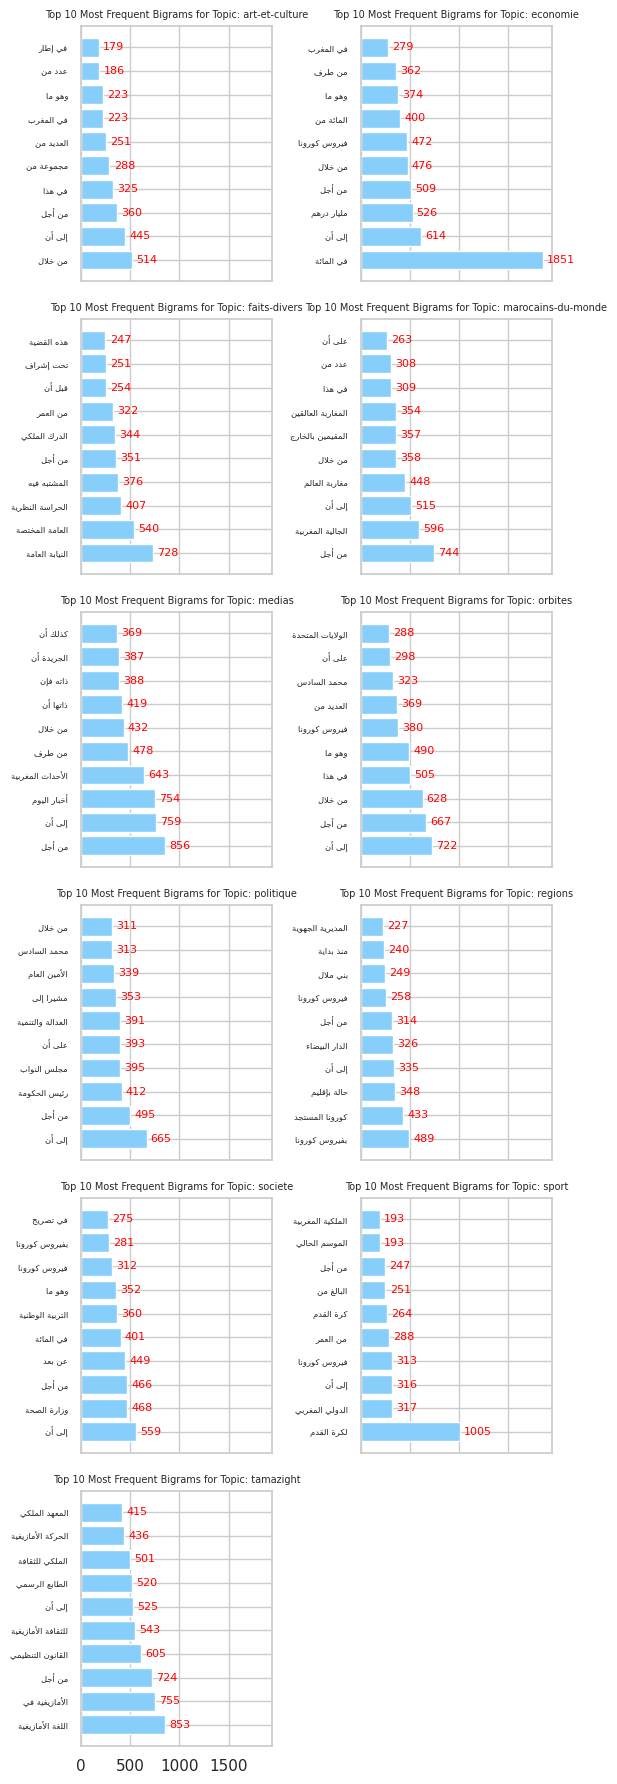

In [78]:
def get_bigram_frequency(dataframe, column_name):
    all_text = " ".join(dataframe[column_name].astype(str))
    words = re.findall(r'\b\w+\b', all_text.lower())
    bigrams = [words[i] + " " + words[i + 1] for i in range(len(words) - 1)]
    bigram_frequency = Counter(bigrams)
    return bigram_frequency

grouped_df = df.groupby('topic')

# Set the font to support Arabic characters
plt.rcParams["font.family"] = "DejaVu Sans"

# Calculate the number of rows and columns for the subplots
num_topics = len(grouped_df)
num_rows = num_topics // 2 + num_topics % 2
num_cols = 2

# Create a single figure to hold all subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(6, 3 * num_rows), sharex=True)

for i, (topic, group) in enumerate(grouped_df):
    print(f"Topic: {topic}")
    bigram_frequency_dict = get_bigram_frequency(group, 'story')
    sorted_bigram_frequency = dict(sorted(bigram_frequency_dict.items(), key=lambda x: x[1], reverse=True))
    print("Top 10 most frequent bigrams:")
    
    # Prepare data for the bar plot
    top_bigrams = list(sorted_bigram_frequency.keys())[:10]
    frequencies = list(sorted_bigram_frequency.values())[:10]
    
    for j, (bigram, frequency) in enumerate(sorted_bigram_frequency.items()):
        print(f"{j+1}. {bigram}: {frequency}")
        if j == 9:
            break
    
    # Use Arabic reshaper for proper display of Arabic text in the plot
    top_bigrams_reshaped = [get_display(arabic_reshaper.reshape(bigram)) for bigram in top_bigrams]
    
    # Calculate the row and column index for the subplot
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Create a bar plot for the top 10 bigrams for each topic
    ax = axes[row_idx, col_idx]
    bars = ax.barh(top_bigrams_reshaped, frequencies, color='lightskyblue')  # Use barh for horizontal bar plots
    
    # Add values above each bar (conditional coloring for frequencies >= 10)
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.0f}', xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='left', va='center',
                    fontsize=8, color='red' if width >= 10 else 'black')
    
    # Set title size to half the current size
    ax.set_title(f"Top 10 Most Frequent Bigrams for Topic: {topic}", fontsize=7)
    ax.tick_params(axis='y', labelsize=6)  # Adjust the fontsize for better readability

# Remove empty subplots if the number of topics is odd and we have an extra subplot
if num_topics % 2 == 1:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.subplots_adjust(hspace=0.15)  # Adjust the space between subplots (one quarter of the current space)
plt.show()

Topic: art-et-culture
Top 10 most frequent trigrams:
1. الثقافة والشباب والرياضة: 136
2. مشيرا إلى أن: 81
3. وزارة الثقافة والشباب: 77
4. لجريدة هسبريس الإلكترونية: 65
5. المركز السينمائي المغربي: 65
6. الإشارة إلى أن: 60
7. تصريح لجريدة هسبريس: 57
8. في تصريح لهسبريس: 56
9. في تصريح لجريدة: 54
10. الدولي للفيلم بمراكش: 52
Topic: economie
Top 10 most frequent trigrams:
1. في المائة من: 400
2. فيروس كورونا المستجد: 207
3. والمالية وإصلاح الإدارة: 176
4. الاقتصاد والمالية وإصلاح: 175
5. في المائة في: 158
6. من السنة الجارية: 120
7. العام لمقاولات المغرب: 112
8. في المائة خلال: 109
9. أزمة فيروس كورونا: 108
10. مشيرا إلى أن: 100
Topic: faits-divers
Top 10 most frequent trigrams:
1. النيابة العامة المختصة: 533
2. تدبير الحراسة النظرية: 239
3. إشراف النيابة العامة: 226
4. تحت إشراف النيابة: 225
5. تحت تدبير الحراسة: 215
6. رهن إشارة البحث: 209
7. الحراسة النظرية رهن: 193
8. النظرية رهن إشارة: 189
9. العامة للأمن الوطني: 186
10. عناصر الدرك الملكي: 153
Topic: marocains-du-monde
Top 10 most f

c:\Users\Zero\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Zero\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65010 missing from current font.
  font.set_text(s, 0, flags=flags)


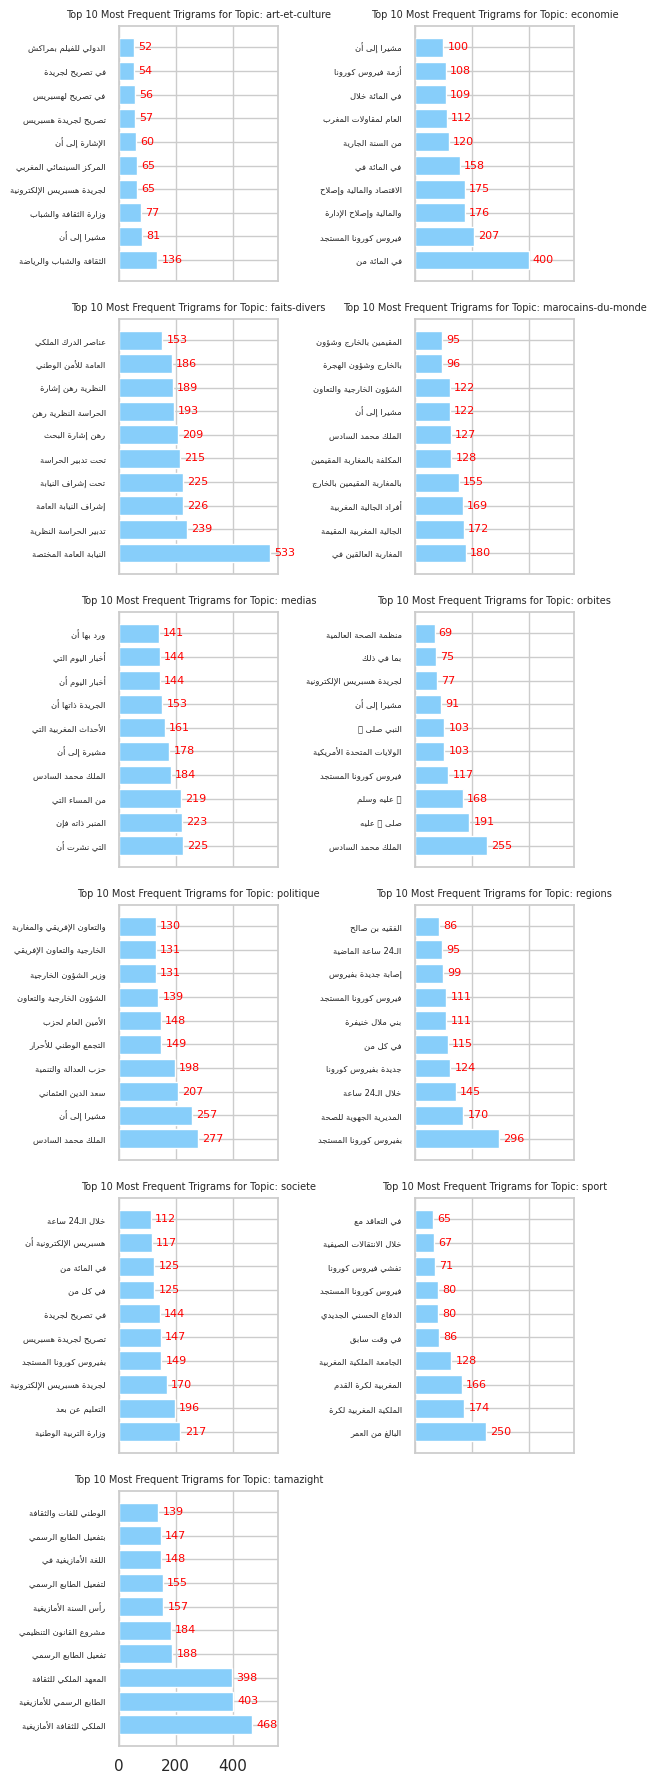

In [80]:
def get_trigram_frequency(dataframe, column_name):
    all_text = " ".join(dataframe[column_name].astype(str))
    words = re.findall(r'\b\w+\b', all_text.lower())
    trigrams = [words[i] + " " + words[i + 1] + " " + words[i + 2] for i in range(len(words) - 2)]
    trigram_frequency = Counter(trigrams)
    return trigram_frequency

grouped_df = df.groupby('topic')

# Set the font to support Arabic characters
plt.rcParams["font.family"] = "DejaVu Sans"

# Calculate the number of rows and columns for the subplots
num_topics = len(grouped_df)
num_rows = num_topics // 2 + num_topics % 2
num_cols = 2

# Create a single figure to hold all subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(6, 3 * num_rows), sharex=True)

for i, (topic, group) in enumerate(grouped_df):
    print(f"Topic: {topic}")
    trigram_frequency_dict = get_trigram_frequency(group, 'story')
    sorted_trigram_frequency = dict(sorted(trigram_frequency_dict.items(), key=lambda x: x[1], reverse=True))
    print("Top 10 most frequent trigrams:")
    
    # Prepare data for the bar plot
    top_trigrams = list(sorted_trigram_frequency.keys())[:10]
    frequencies = list(sorted_trigram_frequency.values())[:10]
    
    for j, (trigram, frequency) in enumerate(sorted_trigram_frequency.items()):
        print(f"{j+1}. {trigram}: {frequency}")
        if j == 9:
            break
    
    # Use Arabic reshaper for proper display of Arabic text in the plot
    top_trigrams_reshaped = [get_display(arabic_reshaper.reshape(trigram)) for trigram in top_trigrams]
    
    # Calculate the row and column index for the subplot
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Create a bar plot for the top 10 trigrams for each topic
    ax = axes[row_idx, col_idx]
    bars = ax.barh(top_trigrams_reshaped, frequencies, color='lightskyblue')  # Use barh for horizontal bar plots
    
    # Add values above each bar (conditional coloring for frequencies >= 10)
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.0f}', xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='left', va='center',
                    fontsize=8, color='red' if width >= 10 else 'black')
    
    # Set title size to half the current size
    ax.set_title(f"Top 10 Most Frequent Trigrams for Topic: {topic}", fontsize=7)
    ax.tick_params(axis='y', labelsize=6)  # Adjust the fontsize for better readability

# Remove empty subplots if the number of topics is odd and we have an extra subplot
if num_topics % 2 == 1:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.subplots_adjust(hspace=0.15)  # Adjust the space between subplots (one quarter of the current space)
plt.show()